In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as dbase
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
conn = dbase.connect('coupon.lite')
cur = conn.cursor()

In [ ]:
"""
To-do list: 
1) SQLization for SQL practice 
2) Translate all japanese to English 
3) Whether people buy coupons only in their geographical area
4) Implementation of data factory system - exploration, transformation, modelling
5) See what coupons (in what area) user browses, to determing list of his interests
6) Add new column to coupons from logs showing how many coupons where bought 
7) See whether people buy coupons not from their region and how often
8) Translate japanese area names into English and place skript to Kaggle
9) Referrer list is strange
"""

In [6]:
coupon_list_test = pd.read_csv('coupon_list_test.csv')

In [9]:
coupon_list_test.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,グルメ,グルメ,52,5659,2690,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-01,2012-10-27,118,1,1,1,1,1,1,1,1,1,関西,大阪府,ミナミ他,c76ea297ebd3a5a4d3bf9f75269f66fa
1,グルメ,グルメ,52,18000,8500,2012-06-27 12:00:00,2012-07-04 12:00:00,7,2012-07-05,2012-10-13,100,1,1,1,1,1,1,0,0,1,関東,東京都,銀座・新橋・東京・上野,dd74dc95ca294afa02db40a543ae1763
2,グルメ,グルメ,51,7200,3480,2012-06-28 12:00:00,2012-07-05 12:00:00,7,2012-07-06,2012-12-28,175,1,1,1,1,1,1,1,1,1,関東,神奈川県,横浜,c65b550cbef918796ad53b1d5b7165c1
3,グルメ,グルメ,50,3300,1650,2012-06-24 12:00:00,2012-06-29 12:00:00,5,2012-06-30,2012-10-31,123,1,1,1,1,2,2,1,1,2,関西,兵庫県,兵庫,f93dc6e223935d817e1237f8f73b56a2
4,グルメ,グルメ,56,3650,1600,2012-06-26 12:00:00,2012-07-03 12:00:00,7,2012-07-04,2012-11-10,129,1,1,1,1,1,1,1,1,1,東海,愛知県,愛知,86c64391318f1d751647bf8e1882cf1d


In [12]:
coupon_list_test.shape

(310, 24)

In [10]:
user_list = pd.read_csv('user_list.csv')

In [33]:
user_list.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME,USER_ID_hash
0,2012-03-28 14:14:18,f,25,NaN,NaN,d9dca3cb44bab12ba313eaa681f663eb
1,2011-05-18 00:41:48,f,34,NaN,東京都,560574a339f1b25e57b0221e486907ed
2,2011-06-13 16:36:58,m,41,NaN,愛知県,e66ae91b978b3229f8fd858c80615b73
3,2012-02-08 12:56:15,m,25,NaN,NaN,43fc18f32eafb05713ec02935e2c2825
4,2011-05-22 23:43:56,m,62,NaN,神奈川県,dc6df8aa860f8db0d710ce9d4839840f


In [13]:
coupon_list_train = pd.read_csv('coupon_list_train.csv')

In [19]:
coupon_list_train[1110:1115]

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
1110,宅配,宅配,50,2350,1175,2011-07-18 12:00:00,2011-07-19 12:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関東,東京都,銀座・新橋・東京・上野,b93f8a8f5c62fc5a998cf1ff16456e9c
1111,グルメ,グルメ,50,2980,1490,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-18,2011-11-30,135,1,0,1,1,1,1,1,1,1,関東,東京都,新宿・高田馬場・中野・吉祥寺,e1a3ebeb29638f63681af70bcc046ed3
1112,その他,その他のクーポン,51,2000,980,2011-07-12 12:00:00,2011-07-14 12:00:00,2,2011-07-15,2011-09-30,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,関西,和歌山県,和歌山,203424cb783c46c0533d701d05d8e326
1113,宅配,宅配,52,4200,2000,2011-07-13 12:00:00,2011-07-15 12:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,中国,岡山県,岡山,d3cdc0bce450fd5a26aab35d5f032c49
1114,グルメ,グルメ,50,2500,1250,2011-07-15 12:00:00,2011-07-18 12:00:00,3,2011-07-19,2011-10-31,104,1,1,1,1,0,0,0,0,0,九州・沖縄,熊本県,熊本,43fa2c2542ac8fd3ba17c4ca97022931


In [15]:
coupon_list_train.shape

(19413, 24)

In [85]:
coupon_visit_train = pd.read_csv('coupon_visit_train.csv')

In [86]:
coupon_visit_train.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


In [87]:
coupon_visit_train.columns

Index(['PURCHASE_FLG', 'I_DATE', 'PAGE_SERIAL', 'REFERRER_hash', 'VIEW_COUPON_ID_hash', 'USER_ID_hash', 'SESSION_ID_hash', 'PURCHASEID_hash'], dtype='object')

In [40]:
coupon_visit_train[coupon_visit_train['USER_ID_hash'] == '560574a339f1b25e57b0221e486907ed'].shape

(123, 8)

In [22]:
coupon_detail_train = pd.read_csv('coupon_detail_train.csv')

In [24]:
coupon_detail_train[20:25]

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
20,1,2012-05-21 19:41:41,新宿・高田馬場・中野・吉祥寺,e47445e2f58d7e9c052aa05a75bf3cdd,43fc18f32eafb05713ec02935e2c2825,bf69bd9e0e26fa1f62243d1fcada38f1
21,1,2012-06-04 21:39:42,新宿・高田馬場・中野・吉祥寺,0325b7df2461cc47c4a46c2eb6e73dae,43fc18f32eafb05713ec02935e2c2825,09411858ae07c0be91aeeddacf4556b4
22,1,2011-07-12 21:26:25,赤坂・六本木・麻布,6236509d170335ddac913622eb1be627,dc6df8aa860f8db0d710ce9d4839840f,05f44676bd11c9f124c4a777c237d37f
23,1,2011-08-02 10:27:13,赤坂・六本木・麻布,4032e8b84605e88a7013e24c2e0c6ee1,dc6df8aa860f8db0d710ce9d4839840f,dba06f247ef3de4110017849d6e6535b
24,2,2011-08-15 00:20:04,恵比寿・目黒・品川,5e2891fa2e1ae43204b94970bdb6a413,dc6df8aa860f8db0d710ce9d4839840f,85b51e105d6faba453d30cd1504e0488


In [6]:
coupon_list_text = pd.read_sql("SELECT * FROM coupon_list_test_translated", conn)

In [7]:
coupon_list_text.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
0,Food,Food,52,5659,2690,2012-06-26 12:00:00,2012-06-30 12:00:00,4,2012-07-01,2012-10-27,118.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,??,???,????,c76ea297ebd3a5a4d3bf9f75269f66fa
1,Food,Food,52,18000,8500,2012-06-27 12:00:00,2012-07-04 12:00:00,7,2012-07-05,2012-10-13,100.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,??,???,???????????,dd74dc95ca294afa02db40a543ae1763
2,Food,Food,51,7200,3480,2012-06-28 12:00:00,2012-07-05 12:00:00,7,2012-07-06,2012-12-28,175.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,??,????,??,c65b550cbef918796ad53b1d5b7165c1
3,Food,Food,50,3300,1650,2012-06-24 12:00:00,2012-06-29 12:00:00,5,2012-06-30,2012-10-31,123.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,??,???,??,f93dc6e223935d817e1237f8f73b56a2
4,Food,Food,56,3650,1600,2012-06-26 12:00:00,2012-07-03 12:00:00,7,2012-07-04,2012-11-10,129.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,??,???,??,86c64391318f1d751647bf8e1882cf1d


In [ ]:
#Let's make a graph that shows amount of coupons by each category

In [11]:
#SQL version 
genre_count = pd.read_sql('SELECT GENRE_NAME, COUNT(GENRE_NAME) FROM coupon_list_test_translated GROUP BY GENRE_NAME', conn)

In [12]:
genre_count.head()

,GENRE_NAME,COUNT(GENRE_NAME)
0,Delivery service,89
1,Food,55
2,Gift card,1
3,Hair salon,25
4,Health and medical,4


In [23]:
#pandas version
genre_count = coupon_list_text.groupby('GENRE_NAME').agg({'CAPSULE_TEXT' : 'count'}).reset_index()

In [37]:
genre_count.head(15)

,GENRE_NAME,CAPSULE_TEXT
0,Delivery service,89
1,Food,55
2,Gift card,1
3,Hair salon,25
4,Health and medical,4
5,Hotel and Japanese hotel,59
6,Leisure,11
7,Lesson,13
8,Nail and eye salon,17
9,Other coupon,6


[]

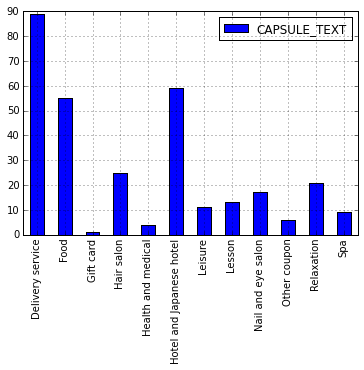

In [68]:
ax = genre_count.plot(kind = 'bar')
ax.set_xticklabels(list(genre_count.GENRE_NAME.values))
plt.plot()

In [63]:
[genre_count.GENRE_NAME.values]

[array(['Delivery service', 'Food', 'Gift card', 'Hair salon',
        'Health and medical', 'Hotel and Japanese hotel', 'Leisure',
        'Lesson', 'Nail and eye salon', 'Other coupon', 'Relaxation', 'Spa'], dtype=object)]

In [ ]:
#Let's find out average discount by each genre

In [71]:
genre_discount = pd.read_sql('SELECT GENRE_NAME, AVG(PRICE_RATE) from coupon_list_test_translated GROUP BY GENRE_NAME', conn)

In [74]:
genre_discount[:]

,GENRE_NAME,AVG(PRICE_RATE)
0,Delivery service,61.191011
1,Food,53.800000
2,Gift card,80.000000
3,Hair salon,71.080000
4,Health and medical,62.750000
5,Hotel and Japanese hotel,53.169492
6,Leisure,53.636364
7,Lesson,71.461538
8,Nail and eye salon,66.294118
9,Other coupon,75.333333


[]

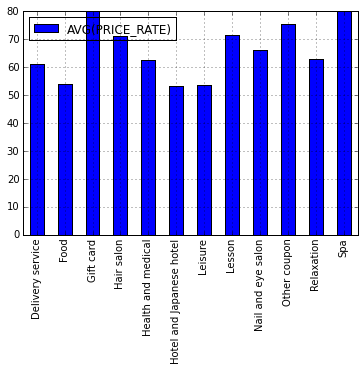

In [78]:
ax = genre_discount.plot(kind = 'bar')

ax.set_xticklabels(list(genre_count.GENRE_NAME.values))
plt.plot()

In [94]:
#Let's see which coupons are the most popular
view = pd.read_sql("SELECT GENRE_NAME, AVG(a.PURCHASE_FLG) FROM coupon_visit_train a JOIN coupon_list_train_translated b ON a.VIEW_COUPON_ID_hash = b.COUPON_ID_hash GROUP BY GENRE_NAME", conn)

In [95]:
view[:]

,GENRE_NAME,AVG(a.PURCHASE_FLG)
0,Beauty,0.042403
1,Delivery service,0.063110
2,Food,0.040233
3,Gift card,0.088388
4,Hair salon,0.049894
5,Health and medical,0.054269
6,Hotel and Japanese hotel,0.020301
7,Leisure,0.059735
8,Lesson,0.036375
9,Nail and eye salon,0.042804


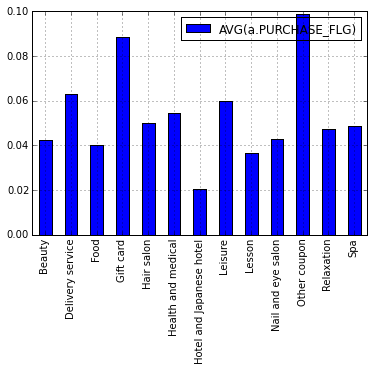

In [98]:
ax = view.plot(kind='bar')

ax.set_xticklabels(list(view.GENRE_NAME.values))
plt.show()

In [57]:
#Let's see who is the most successful referrer
ref = pd.read_sql('select REFERRER_hash, avg(PURCHASE_FLG), COUNT(PURCHASE_FLG), COUNT(CASE WHEN PURCHASE_FLG LIKE '%1%' THEN 1 ELSE NULL END) from coupon_visit_train group by REFERRER_hash ORDER BY avg(PURCHASE_FLG) DESC', conn)

TypeError: not all arguments converted during string formatting

In [42]:
#This is strange
ref.head(10)

,REFERRER_hash,avg(PURCHASE_FLG),COUNT(PURCHASE_FLG),COUNT(CASE WHEN PURCHASE_FLG >= 1000 THEN 1 ELSE NULL END)
0,6c5616ced18d79fa5a97c5c8f3e65f8f,1.000000,112544,112544
1,878034ded0ee2297d7ce27c5169e8584,1.000000,9830,9830
2,6810d0ccfc8d7b817ae5ce734c507c07,0.000101,9948,9948
3,7d3892e54acb559ae36c459978489330,0.000011,1261367,1261367
4,000021db05f2313080fd34d6697a2ad8,0.000000,1,1
5,0002b8d02ce53f9e8c496b1eefb11204,0.000000,3,3
6,0002c1d2d732c18d37d40de5559f46d2,0.000000,3,3
7,00032e2a09f98b5dc77a7a8aa28a2abf,0.000000,2,2
8,000393f24574d132f9f4cf6eef2400ee,0.000000,9,9
9,00058514d38324c1b2af6676cb3061aa,0.000000,8,8


In [55]:
test = pd.read_sql('SELECT purchase_flg from coupon_visit_train where purchase_flg LIKE "%1"', conn)

In [56]:
test.shape

(122389, 1)

In [3]:
coupon_visit_train = pd.read_sql('SELECT * FROM coupon_visit_train', conn)

In [4]:
coupon_visit_train.PURCHASE_FLG = [int(i) for i in coupon_visit_train.PURCHASE_FLG.values]

In [5]:
coupon_visit_train.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,


In [38]:
coupon_visit_train = pd.read_sql('select user_id_hash, sum(purchase_flg) from coupon_visit_train GROUP BY user_id_hash order by sum(purchase_flg) desc', conn)

In [39]:
coupon_visit_train.head()

,USER_ID_hash,sum(purchase_flg)
0,332842367488a861f1d53d928393143a,104
1,acd5e20541a5177e039835cef949d38d,100
2,2f3eee0e00feb2020d5a4e99e31adfba,88
3,9e3ac24ea566eb7d12a78c7f2cd94f66,87
4,4c20177df5716ba57105ba5d9ed3c460,85


In [45]:
a = pd.read_sql('SELECT COUNT(DISTINCT(VIEW_COUPON_ID_hash)) from coupon_visit_train', conn)

In [46]:
a.head()

,COUNT(DISTINCT(VIEW_COUPON_ID_hash))
0,32628


In [70]:
def variance(a):
    mean = sum(a)/len(a)
    return sum([(i - mean)**2 for i in a])/len(a)

def std_dev(a):
    return variance(a)**0.5
a = [1,2,3,4,5,6,7]

x = [i * 10 for i in range(1,11)]
m = [a+[i] for i in x]
y = [variance(i) for i in m]
z = [std_dev(i) for i in m]

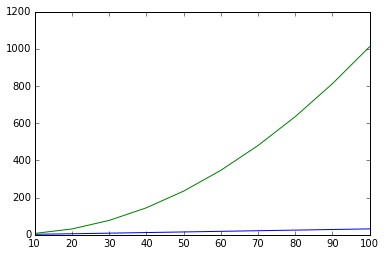

In [72]:
plt.plot(x,z)
plt.plot(x,y)
plt.show()

In [75]:
cur.execute('SELECT coupon.GENRE_NAME, SUM(log.PURCHASE_FLG), coupon.DISCOUNT_PRICE, SUM(log.PURCHASE_FLG)*coupon.DISCOUNT_PRICE FROM coupon_list_train coupon JOIN coupon_visit_train log ON log.VIEW_COUPON_ID_hash = coupon.COUPON_ID_hash WHERE log.PURCHASE_FLG=1 GROUP BY coupon.GENRE_NAME')

In [106]:
a  = pd.read_sql('SELECT coupon.GENRE_NAME, SUM(log.PURCHASE_FLG), AVG(coupon.DISCOUNT_PRICE), SUM(log.PURCHASE_FLG)*coupon.DISCOUNT_PRICE AS REVENUE FROM coupon_list_train_translated coupon JOIN coupon_visit_train log ON log.VIEW_COUPON_ID_hash = coupon.COUPON_ID_hash WHERE log.PURCHASE_FLG LIKE "%1%" GROUP BY coupon.GENRE_NAME', conn)

In [107]:
a[:]

,GENRE_NAME,SUM(log.PURCHASE_FLG),AVG(coupon.DISCOUNT_PRICE),REVENUE
0,Beauty,84,4146.964286,250320
1,Delivery service,45499,1963.068067,76438320
2,Food,26631,1900.752169,26098380
3,Gift card,6493,509.281380,12986000
4,Hair salon,2498,4138.481986,11490800
5,Health and medical,164,11831.402439,861000
6,Hotel and Japanese hotel,12314,8774.029641,36695720
7,Leisure,5066,1418.941966,12462360
8,Lesson,1018,11855.969548,20156400
9,Nail and eye salon,1198,3260.039232,3773700


[]

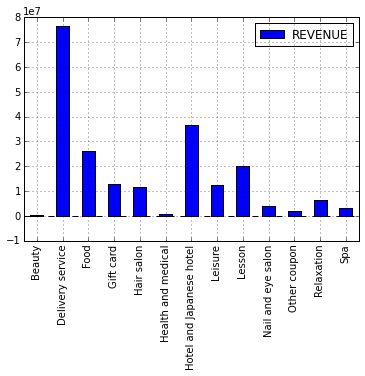

In [93]:


ax = a[['GENRE_NAME', 'REVENUE']].plot(kind = 'bar')

ax.set_xticklabels(list(a[['GENRE_NAME', 'REVENUE']].GENRE_NAME.values))
plt.plot()

In [105]:
pd.read_sql('SELECT SEX_ID, COUNT(SEX_ID) FROM user_list GROUP BY SEX_ID',conn) 

,SEX_ID,COUNT(SEX_ID)
0,0,11890
1,1,10983


In [119]:
a  = pd.read_sql('SELECT coupon.GENRE_NAME, user.SEX_ID, SUM(log.PURCHASE_FLG) AS REVENUE FROM coupon_list_train_translated coupon JOIN coupon_visit_train log ON log.VIEW_COUPON_ID_hash = coupon.COUPON_ID_hash JOIN user_list user ON log.USER_ID_hash = user.USER_ID_hash WHERE log.PURCHASE_FLG LIKE "%1%" GROUP BY coupon.GENRE_NAME, user.SEX_ID', conn)

In [120]:
a[:]

,GENRE_NAME,SEX_ID,REVENUE
0,Beauty,0,12
1,Beauty,1,72
2,Delivery service,0,18242
3,Delivery service,1,27257
4,Food,0,15237
5,Food,1,11394
6,Gift card,0,3243
7,Gift card,1,3250
8,Hair salon,0,372
9,Hair salon,1,2126


In [115]:
b  = pd.read_sql('SELECT coupon.GENRE_NAME, SUM(log.PURCHASE_FLG), AVG(coupon.DISCOUNT_PRICE), SUM(log.PURCHASE_FLG)*coupon.DISCOUNT_PRICE AS REVENUE FROM coupon_list_train_translated coupon JOIN coupon_visit_train log ON log.VIEW_COUPON_ID_hash = coupon.COUPON_ID_hash JOIN user_list user ON log.USER_ID_hash = user.USER_ID_hash WHERE log.PURCHASE_FLG LIKE "%1%" and user.SEX_ID = 1 GROUP BY coupon.GENRE_NAME', conn)

In [116]:
b[:]

,GENRE_NAME,SUM(log.PURCHASE_FLG),AVG(coupon.DISCOUNT_PRICE),REVENUE
0,Beauty,72,4313.819444,216000
1,Delivery service,27257,1919.226327,27229743
2,Food,11394,1810.825083,19939500
3,Gift card,3250,512.550462,6500000
4,Hair salon,2126,4176.610066,6335480
5,Health and medical,112,10239.821429,1555680
6,Hotel and Japanese hotel,4686,9062.195689,45922800
7,Leisure,2242,1447.339429,1121000
8,Lesson,728,12865.276099,14487200
9,Nail and eye salon,1158,3265.204663,3450840


In [127]:
0.02*0.98/(0.02*0.98+0.98*0.74)

0.026315789473684213